In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install networkx
!pip install pandas scikit-learn

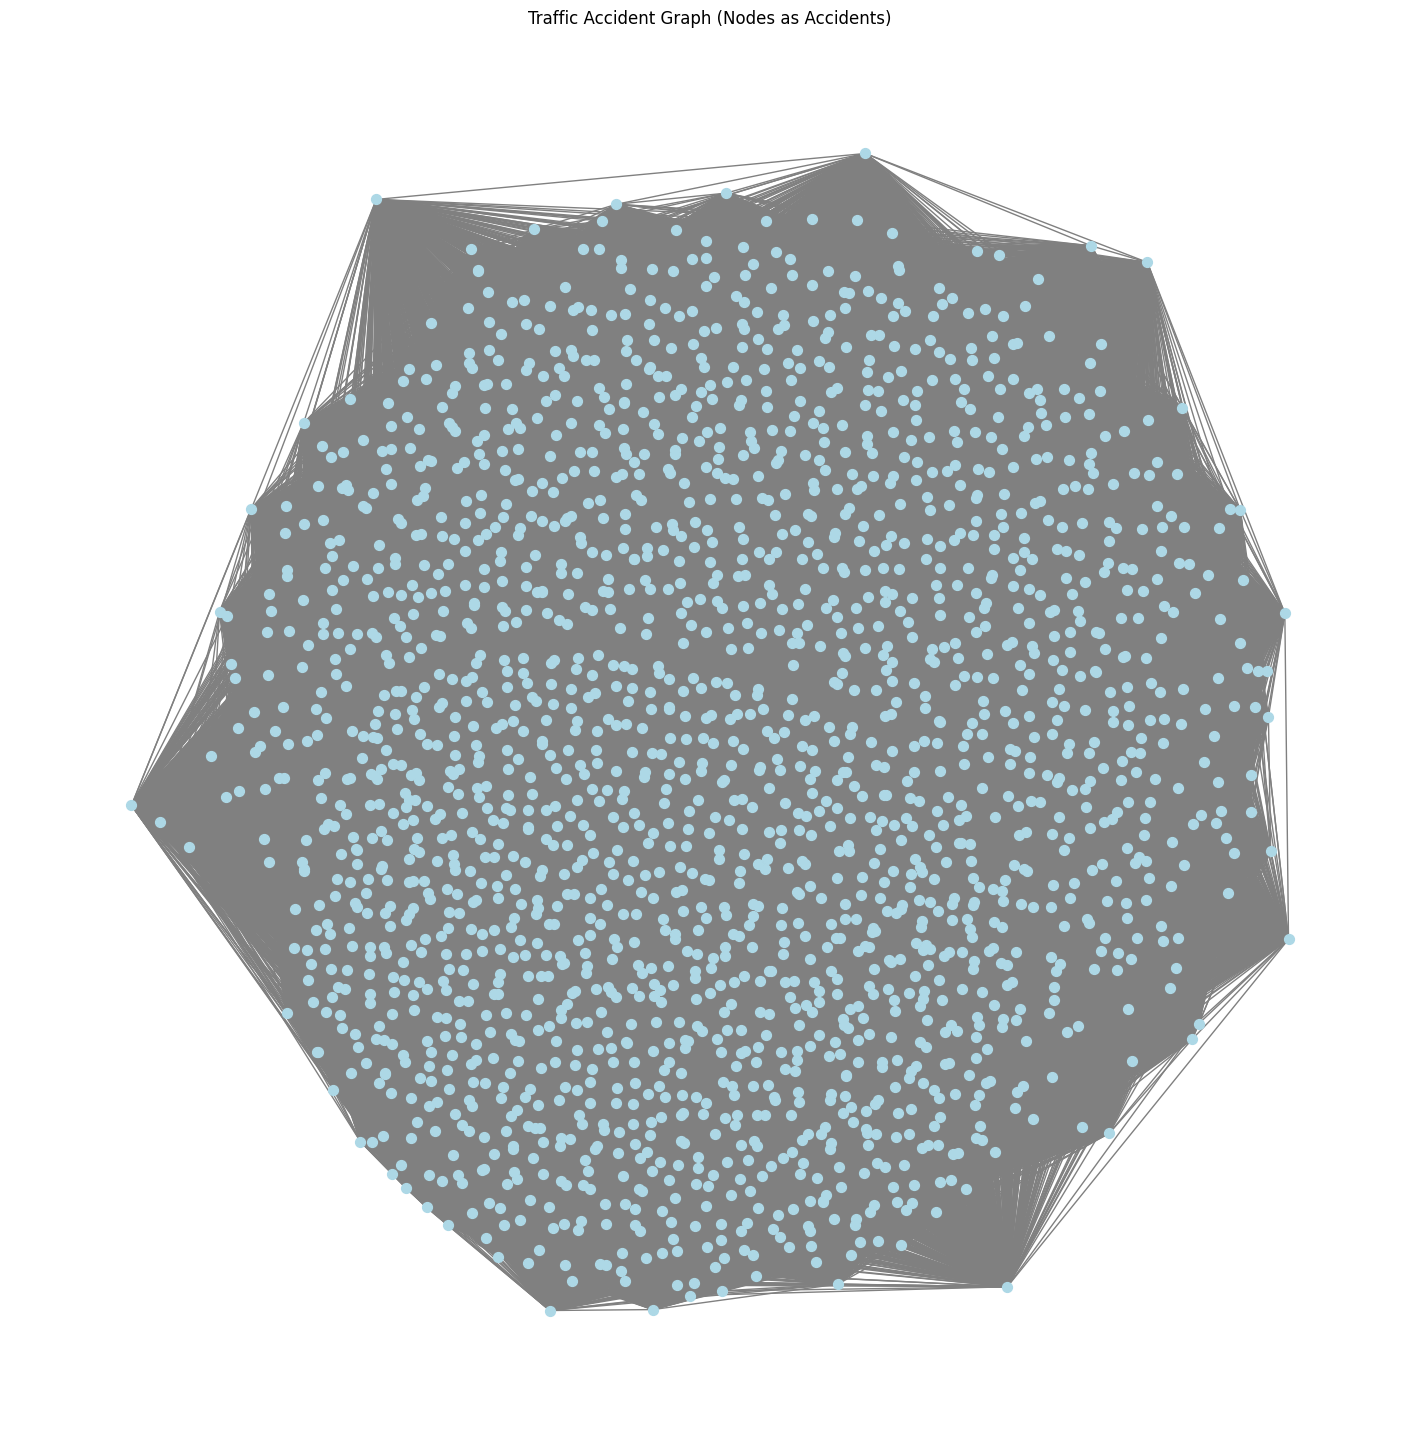

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Đọc dataset
file_path = 'encoded_dataset_deleted.csv'  # Đặt đường dẫn dataset của bạn
df = pd.read_csv(file_path)

df = df.sample(2000) # Lấy ngẫu nhiên 2000 dòng dữ liệu

# Khởi tạo đồ thị
G = nx.Graph()

# Thêm nút cho mỗi vụ tai nạn (dựa trên index)
for index, row in df.iterrows():
    G.add_node(index,
               traffic_control_device=row['traffic_control_device'],
               weather_condition=row['weather_condition'],
               lighting_condition=row['lighting_condition'],
               first_crash_type=row['first_crash_type'],
               trafficway_type=row['trafficway_type'],
               alignment=row['alignment'],
               roadway_surface_cond=row['roadway_surface_cond'],
               road_defect=row['road_defect'],
               crash_type=row['crash_type'],
               intersection_related_i=row['intersection_related_i'],
               damage=row['damage'],
               prim_contributory_cause=row['prim_contributory_cause'],
               num_units=row['num_units'],
               most_severe_injury=row['most_severe_injury'],
               injuries_total=row['injuries_total'],
               injuries_fatal=row['injuries_fatal'],
               injuries_incapacitating=row['injuries_incapacitating'],
               injuries_non_incapacitating=row['injuries_non_incapacitating'],
               injuries_reported_not_evident=row['injuries_reported_not_evident'],
               injuries_no_indication=row['injuries_no_indication'],
               crash_hour=row['crash_hour'],
               crash_day_of_week=row['crash_day_of_week'],
               crash_month=row['crash_month'])

# Hàm kiểm tra điều kiện kết nối giữa hai vụ tai nạn
def is_similar(accident1, accident2):
    # Các điều kiện tương tự dựa trên các đặc trưng quan trọng
    time_diff = abs(accident1['crash_hour'] - accident2['crash_hour']) <= 1
    same_month = accident1['crash_month'] == accident2['crash_month']
    same_day_of_week = accident1['crash_day_of_week'] == accident2['crash_day_of_week']
    same_trafficway = accident1['trafficway_type'] == accident2['trafficway_type']
    same_crash_type = accident1['first_crash_type'] == accident2['first_crash_type']
    same_injury_no_indication = accident1['injuries_no_indication'] == accident2['injuries_no_indication']

    # Kết nối nếu ít nhất một điều kiện tương tự
    return (time_diff or same_month or same_day_of_week or same_trafficway or
            same_crash_type or same_injury_no_indication)

# Thêm các cạnh dựa trên tính tương đồng
for u, v in combinations(G.nodes(data=True), 2):
    if is_similar(u[1], v[1]):
        G.add_edge(u[0], v[0])

# Vẽ đồ thị
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.3)  # Điều chỉnh k để tối ưu bố cục
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=50, font_size=8)
plt.title("Traffic Accident Graph (Nodes as Accidents)")
plt.show()

🔎 Số lượng nút ban đầu: 2000
✅ Số lượng nút - Train: 1400, Test: 400, Val: 200


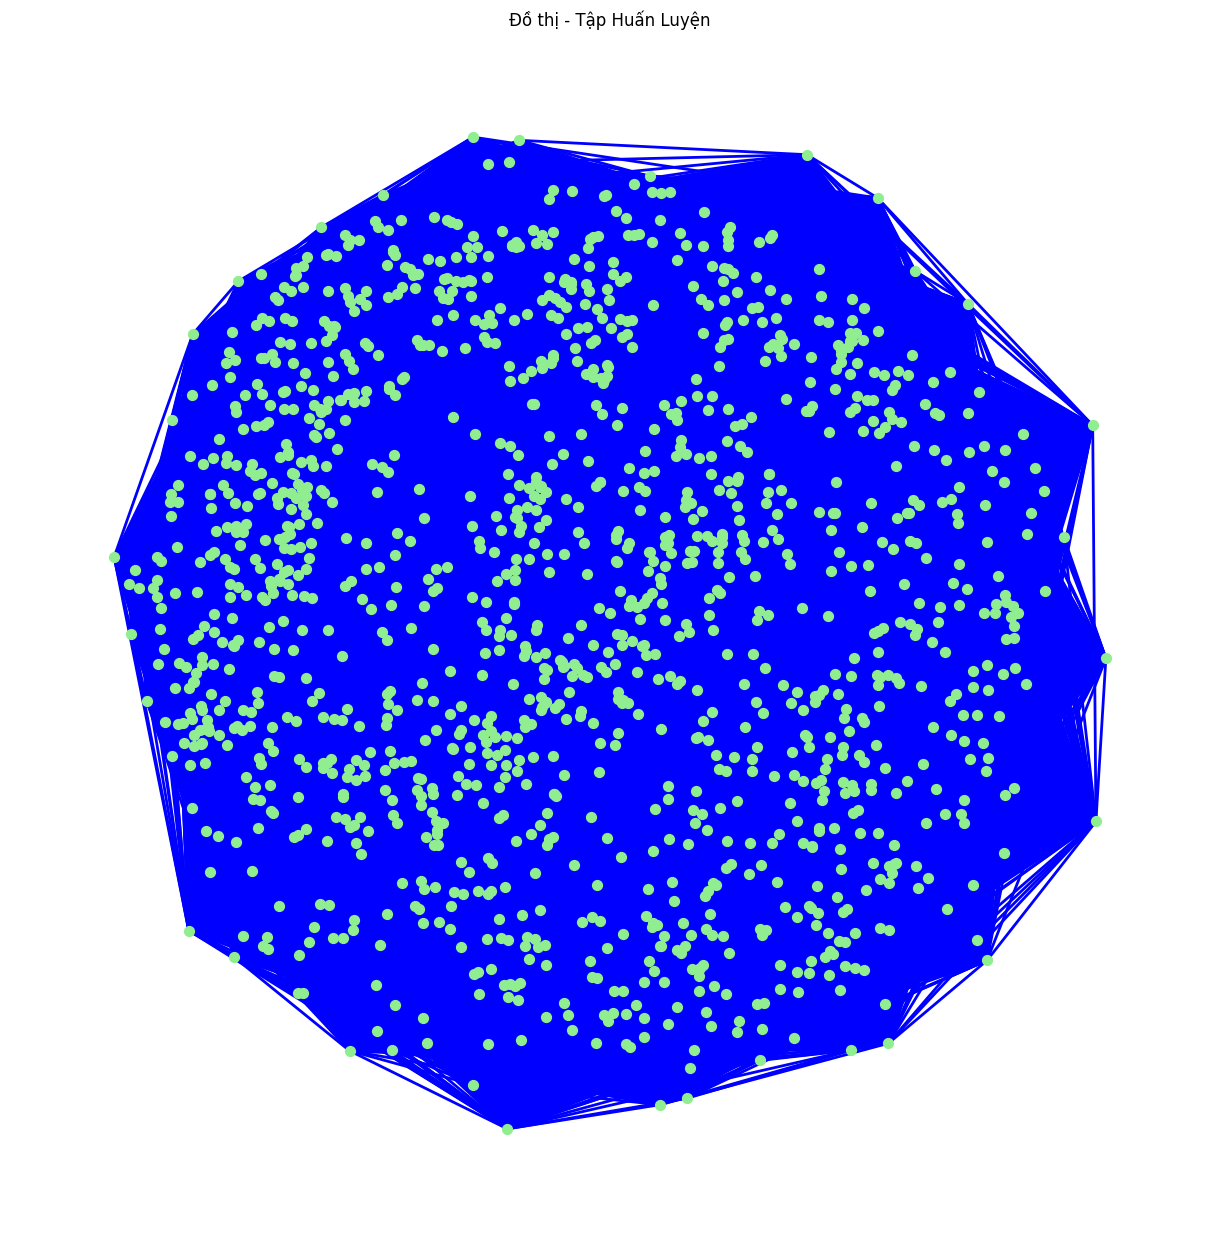

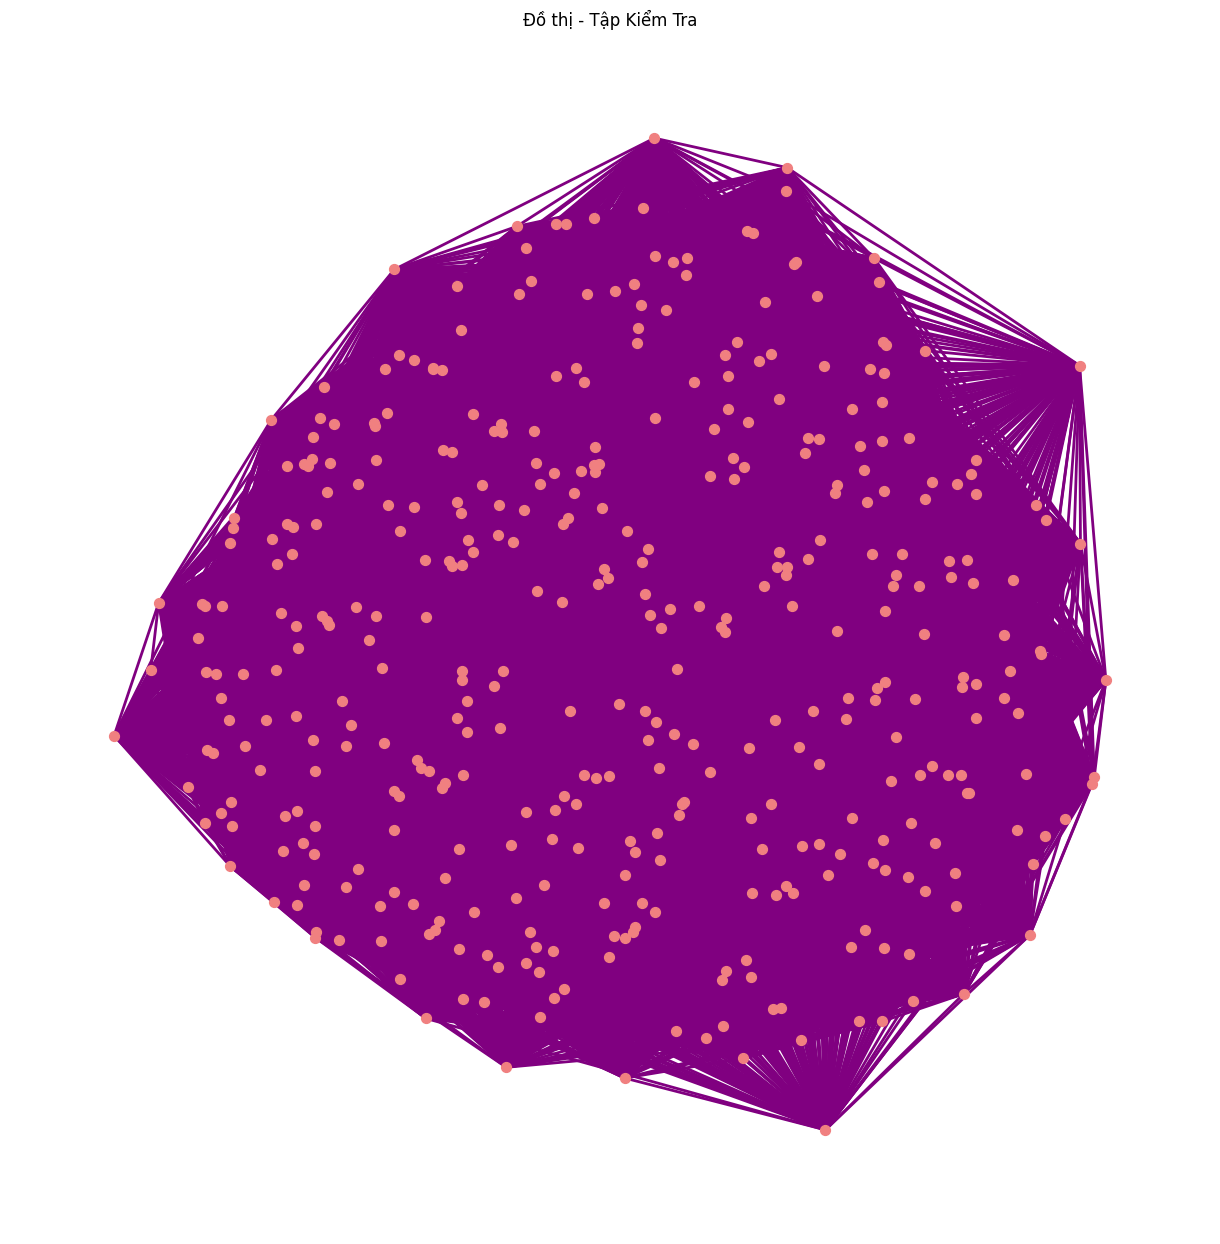

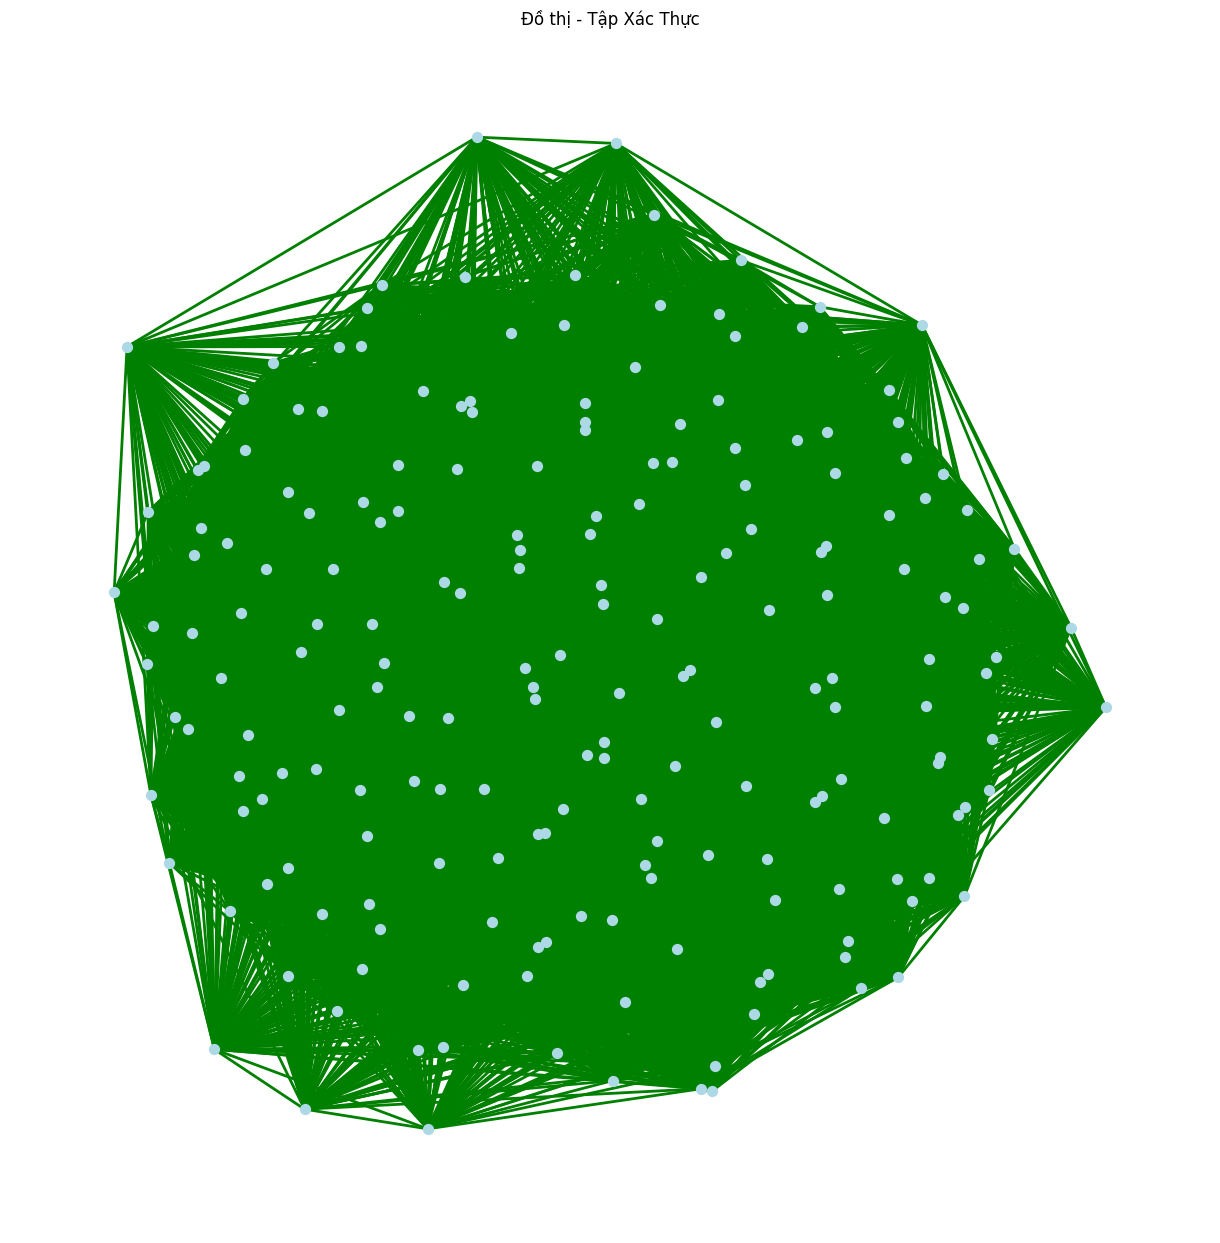

In [ ]:
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Giả sử đồ thị G đã được tạo từ trước
print("🔎 Số lượng nút ban đầu:", G.number_of_nodes())

# Lấy danh sách các nút
nodes = list(G.nodes)

# Chia tập huấn luyện (70%) và tập còn lại (30%)
train_nodes, remaining_nodes = train_test_split(
    nodes, test_size=0.3, random_state=42
)

# Chia tiếp tập còn lại thành kiểm tra (20%) và xác thực (10%)
test_nodes, val_nodes = train_test_split(
    remaining_nodes, test_size=0.333, random_state=42
)  # 0.333 * 30% = 10%

print(f"✅ Số lượng nút - Train: {len(train_nodes)}, Test: {len(test_nodes)}, Val: {len(val_nodes)}")

# Tạo đồ thị con cho từng tập
G_train = G.subgraph(train_nodes).copy()
G_test = G.subgraph(test_nodes).copy()
G_val = G.subgraph(val_nodes).copy()

# Vẽ tập huấn luyện
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_train)
nx.draw(G_train, pos, with_labels=False, node_color='lightgreen',
        edge_color='blue', width=2, node_size=50, font_size=10)
plt.title("Đồ thị - Tập Huấn Luyện")
plt.show()

# Vẽ tập kiểm tra
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_test)
nx.draw(G_test, pos, with_labels=False, node_color='lightcoral',
        edge_color='purple', width=2, node_size=50, font_size=10)
plt.title("Đồ thị - Tập Kiểm Tra")
plt.show()

# Vẽ tập xác thực
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_val)
nx.draw(G_val, pos, with_labels=False, node_color='lightblue',
        edge_color='green', width=2, node_size=50, font_size=10)
plt.title("Đồ thị - Tập Xác Thực")
plt.show()
